### Objective: Perform EDA to find out how many customers are actually Satisfied with the Products and services provided by a Retail Company

In [45]:
# Importing neccessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
# read the data
data= pd.read_csv("dirty_data.csv")
data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22/06/2019,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29/12/2019,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02/03/2019,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12/01/2019,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28/11/2019,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [47]:
data.shape

(500, 16)

In [48]:
# get the statistical description of the data
data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,distance_to_nearest_warehouse
count,498.000000,496.000000,500.000000,500.000000,500.000000,500.000000
mean,25585.387550,76.679819,-35.835234,144.969494,10.890000,2.204224
std,86501.420493,14.529621,12.045393,0.022720,8.649134,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,0.107800
25%,7050.000000,65.892500,-37.818222,144.953488,5.000000,0.751425
50%,12865.000000,76.335000,-37.812165,144.965357,10.000000,1.030100
75%,20360.000000,82.817500,-37.805364,144.983985,15.000000,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,94.973400


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    498 non-null    float64
 6   delivery_charges               496 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    object 
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [50]:
data.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      2
delivery_charges                 4
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                4
dtype: int64

# Box plot with null values

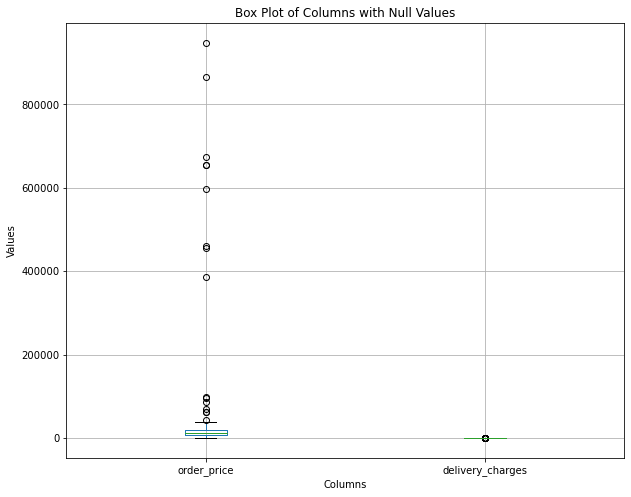

In [51]:
plt.figure(figsize=(10,8))
data.boxplot(column=['order_price','delivery_charges'])
plt.title('Box Plot of Columns with Null Values')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


In [52]:
# since order price has some outliers,null values of order price will be replaced with median
data['order_price']=data['order_price'].fillna(data['order_price'].median())

In [53]:
#Replacing null values with mean
data['delivery_charges']=data['delivery_charges'].fillna(data['delivery_charges'].mean())

In [54]:
#Replacing null values with mode
data['is_happy_customer']=data['is_happy_customer'].fillna(data['is_happy_customer'].mode()[0])

In [55]:
data.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64

In [56]:
data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                       object
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

### Date Type conversion 

In [57]:
data['date']=pd.to_datetime(data['date'])

In [58]:
data.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                             float64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                              object
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

In [59]:
data.order_id.is_unique

True

In [60]:
data.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson',
       'Thompson911', '1211Bakers', 'Nick123olson'], dtype=object)

### Using Regular Expression to clean the data

In [61]:
pattern='\d+'
pat_bool=data.nearest_warehouse.str.contains(pattern,regex=True)
result=data[pat_bool]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
426,ORD057375,ID0710001161,2019-03-02,Thompson911,"[('Thunder line', 1), ('Alcon 10', 1), ('Candl...",18460.0,93.52,-37.813736,144.936811,25,665085.66,Summer,True,0.9098,best buy i've made on digico functions properl...,True
467,ORD144784,ID0333901582,2019-09-11,1211Bakers,"[('Olivia x460', 2), ('Lucent 330S', 2)]",4910.0,108.87,-37.801844,144.981358,25,3791.37,Autumn,True,1.5207,turned our old tv into a smart tv. really easy...,True
494,ORD379700,ID2190564628,2019-05-08,Nick123olson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Luc...",17510.0,75.37,-37.816209,144.964057,5,16709.87,Winter,True,0.5513,"good quality price ratio bought it for my mom,...",True


In [62]:
#Replacing the numbers with nothing
data['nearest_warehouse']=data.nearest_warehouse.str.replace('\d+','')

In [63]:
pattern='\d+'
pat_bool=data.nearest_warehouse.str.contains(pattern,regex=True)
result=data[pat_bool]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


In [64]:
data['nearest_warehouse']=data['nearest_warehouse'].str.title()

In [65]:
data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

In [66]:
#lets count the unique values
data['nearest_warehouse'].value_counts()

Thompson     197
Nickolson    184
Bakers       119
Name: nearest_warehouse, dtype: int64

In [67]:
data['order_total'].dtypes

dtype('O')

In [68]:
#data['order_total'].astype('float')

In [69]:
#checking whether order_total contains alphabets or not
pattern='[a-zA-Z]'
pat_bool=data['order_total'].str.contains(pattern,regex=True)
result=data[pat_bool]
result['order_total']

8      229sav58.58
38    116r@RR20.28
77    28GG^&056.18
Name: order_total, dtype: object

In [70]:
data['order_total']=data['order_total'].str.replace('[^0-9.]',"")

In [71]:
pattern='[a-zA-Z]'
pat_bool=data['order_total'].str.contains(pattern,regex=True)
result=data[pat_bool]
result['order_total']

Series([], Name: order_total, dtype: object)

In [72]:
data['order_total']=data['order_total'].astype('float')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    float64       
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [74]:
data.season.unique()

array(['Winter', 'Summer', 'Autumn', 'Spring', 'winter', 'spring',
       'autumn', 'summer'], dtype=object)

In [75]:
data['season']=data.season.str.title()

In [76]:
data.season.unique()

array(['Winter', 'Summer', 'Autumn', 'Spring'], dtype=object)

In [77]:
data.season.value_counts()

Spring    134
Autumn    127
Summer    124
Winter    115
Name: season, dtype: int64

In [78]:
data.is_expedited_delivery.unique()

array([ True, False])

In [79]:
data.is_expedited_delivery.value_counts()

False    251
True     249
Name: is_expedited_delivery, dtype: int64

In [80]:
data.is_happy_customer.unique()

array([ True, False])

In [81]:
data.is_happy_customer.value_counts()

True     360
False    140
Name: is_happy_customer, dtype: int64

### Bar chart for warehouse

Text(0, 0.5, 'counts')

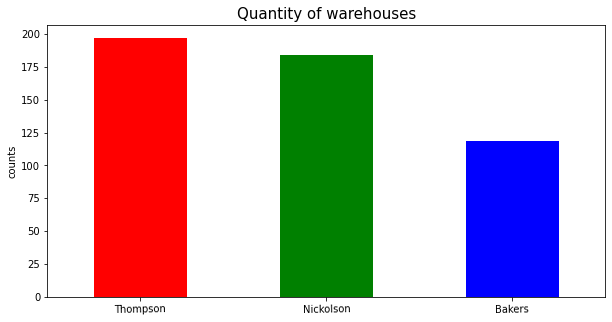

In [82]:
warehouse=data['nearest_warehouse'].value_counts()
warehouse.plot(kind='bar',figsize=(10,5),color=['r','g','b'],rot=1)
plt.title("Quantity of warehouses",size=15)
plt.ylabel("counts")

### Pie chart to check percentage of warehouses share

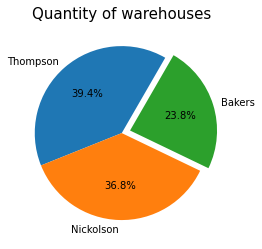

In [83]:
plt.pie(warehouse,labels=['Thompson','Nickolson','Bakers'],autopct='%0.1f%%',explode=[0,0,0.1],startangle=60,radius=1)
plt.title("Quantity of warehouses", size=15)
plt.show()

### Analyzing order_price and order_total

In [84]:
#order_price before any discounts and delivery charges 
#rder_total: Price after all discounts and/or delivery charges are applied

In [85]:
# minimum order_price
data[data['order_price']==data['order_price'].min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585.0,91.79,-37.800798,145.005428,25,639.29,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False


In [86]:
#maximum order_price
data[data['order_price']==data['order_price'].max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691.0,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


In [87]:
#lets check wheather order_total (after all discounts and delivery charges are applied) is correct or not
data[['order_price','delivery_charges','coupon_discount','order_total']].head(20)

,order_price,delivery_charges,coupon_discount,order_total
0,12200.0,79.89,10,11059.89
1,9080.0,62.71,0,9142.71
2,10670.0,65.87,10,9668.87
3,24800.0,57.61,15,21137.61
4,9145.0,75.54,25,6934.29
5,7810.0,71.22,10,7100.22
6,13700.0,74.84,5,13089.84
7,7960.0,52.28,5,10789.79
8,25390.0,107.58,10,22958.58
9,13320.0,62.26,15,11384.26


order_total=order_price-(order_price*coupon_discount/100)+delivery_charges

In [88]:
# lets check first 10 order total values

In [89]:
for i,index in enumerate(range(0,20)):
    if  data['order_price'][i] != 0:
        order_total=data['order_price'][i]-((data['order_price'][i]*data['coupon_discount'][i])/100)+data['delivery_charges'][i]
        print(f"order_total at {index} :{order_total}")
        
    else:
        order_total=data['order_price'][i]++data['delivery_charges'][i]
        print(f"order_total at {index} :{order_total}")

order_total at 0 :11059.89
order_total at 1 :9142.71
order_total at 2 :9668.87
order_total at 3 :21137.61
order_total at 4 :6934.29
order_total at 5 :7100.22
order_total at 6 :13089.84
order_total at 7 :7614.28
order_total at 8 :22958.58
order_total at 9 :11384.26
order_total at 10 :31973.25
order_total at 11 :10464.79
order_total at 12 :19104.75
order_total at 13 :19785.64
order_total at 14 :31979.78
order_total at 15 :15196.35
order_total at 16 :11188.19
order_total at 17 :1304.52
order_total at 18 :6268.89
order_total at 19 :6294.86


some of order_total values are incorrect,lets correct them

In [90]:
final_lst=[]
for i,index in enumerate(range(0,len(data['order_price']))):
    if data['order_price'][i] !=0:
        disc_price=data['order_price'][i]-((data['order_price'][i]*data['coupon_discount'][i])/100)
        total_price=disc_price+data['delivery_charges'][i]
        total_price=round(total_price,2)
        final_lst.append(total_price)
    else:
        total_price=data['order_price'][i]+data['delivery_charges'][i]
        total_price=round(total_price,2)
        final_lst.append(total_price)

In [91]:
final_lst[0:10]

[11059.89,
 9142.71,
 9668.87,
 21137.61,
 6934.29,
 7100.22,
 13089.84,
 7614.28,
 22958.58,
 11384.26]

In [92]:
data['order_total']=final_lst

In [93]:
data['order_total'][0:10]

0    11059.89
1     9142.71
2     9668.87
3    21137.61
4     6934.29
5     7100.22
6    13089.84
7     7614.28
8    22958.58
9    11384.26
Name: order_total, dtype: float64

### Outliers Check

In [94]:
Q1_outlier_check=data['order_total'].quantile(0.25)
Q3_outlier_check=data['order_total'].quantile(0.75)
print(f'Lower Quantile is: {Q1_outlier_check}')
print(f'upper Quantile is: {Q3_outlier_check}')
      
IQR=Q3_outlier_check - Q1_outlier_check
print(f'IQR Value of order_total is : {IQR}')

Lower Quantile is: 6388.34
upper Quantile is: 17926.88
IQR Value of order_total is : 11538.54


In [95]:
lower_limit_order_total= Q1_outlier_check -1.5 * IQR
upper_limit_order_total= Q3_outlier_check + 1.5 * IQR
print(f'lower_limit_order_total is : {lower_limit_order_total}')
print(f'upper_limit_order_total is : {upper_limit_order_total}')

lower_limit_order_total is : -10919.470000000001
upper_limit_order_total is : 35234.69


In [96]:
data[data['order_total']==data['order_total'].min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585.0,91.79,-37.800798,145.005428,25,530.54,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False


In [97]:
data[data['order_total']==data['order_total'].max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691.0,90.82,-37.809368,144.949342,10,853012.72,Summer,True,0.4187,work fine great product and no issues.,True


In [98]:
#lets check how many outliers in data
outlier_data=data[(data['order_total'] <lower_limit_order_total) | (data['order_total'] >upper_limit_order_total)]
outlier_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
55,ORD442452,ID0582560124,2019-08-26,Nickolson,"[('Alcon 10', 2), ('Toshika 750', 2), ('pearTV...",43520.0,62.93,-37.822185,144.978657,5,41406.93,Winter,True,0.8949,was not described accurately phone was labeled...,False
61,ORD028755,ID0283255338,2019-06-13,Bakers,"[('iAssist Line', 2), ('pearTV', 2), ('Thunder...",37150.0,65.32,-37.803982,145.007587,0,37215.32,Winter,True,1.2762,i order google pixel 2xl and it's come google ...,False
67,ORD158007,ID3106293373,2019-02-22,Thompson,"[('iStream', 1), ('Olivia x460', 1), ('Alcon 1...",61619.0,79.39,-37.806607,144.932452,15,52455.54,Summer,False,1.4520,mom loves it i bought this for my mom and she ...,True
70,ORD122655,ID1725216621,2019-06-28,Thompson,"[('Universe Note', 2), ('Thunder line', 1), ('...",655164.0,81.70,-37.804091,144.961911,10,589729.30,Winter,True,1.6176,five stars excellent phone! i do not understan...,True
156,ORD127141,ID0777789266,2019-03-02,Thompson,"[('Lucent 330S', 2), ('pearTV', 1), ('iAssist ...",69685.0,92.70,-37.806827,144.954899,0,69777.70,Summer,True,0.9475,remarkable phone with an unbeatable price. rem...,True
237,ORD420200,ID2189162941,2019-06-12,Thompson,"[('Alcon 10', 1), ('Olivia x460', 1), ('pearTV...",865916.0,92.90,-37.811745,144.956404,15,736121.50,Summer,True,0.8274,five stars great phone,True
289,ORD339649,ID2207661056,2019-08-16,Thompson,"[('Alcon 10', 1), ('Thunder line', 2), ('Unive...",597240.0,79.91,-37.801295,144.945787,5,567457.91,Winter,True,1.2716,this was bought to replace my old candle with ...,True
299,ORD379975,ID0144730304,2019-01-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1)]",96385.0,77.51,-37.819260,144.957538,25,72366.26,Summer,False,1.0590,good quality great price,True
307,ORD346356,ID0312718298,2019-02-10,Thompson,"[('Candle Inferno', 1), ('Thunder line', 2), (...",63500.0,107.18,-37.803331,144.959131,25,47732.18,Spring,True,1.4855,five stars love phone,True
313,ORD496181,ID0781107765,2019-09-20,Bakers,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",461736.0,87.31,-37.818497,145.015417,25,346389.31,Spring,False,2.0115,so good. have not had time to use it much so f...,True


In [99]:
outlier_data.shape

(18, 16)

### Remove Outliers

In [100]:
len(data['order_total'])

500

In [101]:
data=data[(data['order_total']>lower_limit_order_total) & (data['order_total']<upper_limit_order_total)]
print(f'Total no. of records without outliers are: {data.shape[0]}')

Total no. of records without outliers are: 482


## Find out happy customers


In [102]:
data[data['season']=='Summer']

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
11,ORD361636,ID0589500304,2019-05-12,Nickolson,"[('Lucent 330S', 1), ('pearTV', 2)]",13850.0,77.29,-37.820228,144.957411,25,10464.79,Summer,False,1.0829,great phone great deal! phone in fantastic con...,True
12,ORD124395,ID0702352304,2019-11-02,Thompson,"[('Alcon 10', 1), ('Universe Note', 1), ('pear...",19010.0,94.75,-37.805433,144.941333,0,19104.75,Summer,True,0.9509,the cult's alive i love this little dummy-phon...,True
13,ORD255642,ID3085953531,2019-12-24,Nickolson,"[('iAssist Line', 2), ('Alcon 10', 1), ('pearT...",19710.0,75.64,-37.816166,144.975278,0,19785.64,Summer,True,0.5716,phone had a problem phone seemed great but con...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,ORD175025,ID1132069624,2019-06-12,Thompson,"[('Universe Note', 1), ('Thunder line', 1)]",5630.0,66.70,-37.813462,144.944369,10,5133.70,Summer,False,0.2531,"like this new s7 ! phone was shipped promptly,...",True
480,ORD194707,ID0723965013,2019-12-28,Bakers,"[('Candle Inferno', 1), ('Toshika 750', 1), ('...",10660.0,75.42,37.804082,145.005281,25,8070.42,Summer,False,1.1020,she loves it . it's the best thing we could of...,True
481,ORD050839,ID4313862247,2019-12-27,Bakers,"[('iStream', 1), ('pearTV', 1), ('Alcon 10', 2)]",24360.0,96.69,-37.819364,144.990224,10,22020.69,Summer,True,1.1320,gecksqd. helpful in understanding different th...,True
485,ORD213192,ID2325395496,2019-03-28,Bakers,"[('iAssist Line', 2), ('Thunder line', 1), ('i...",6930.0,64.75,-37.810688,144.985503,0,6994.75,Summer,True,0.8590,two stars the keyboard so hard to tape in.,False


In [103]:
satisfaction=data.is_happy_customer.value_counts()
satisfaction

True     345
False    137
Name: is_happy_customer, dtype: int64

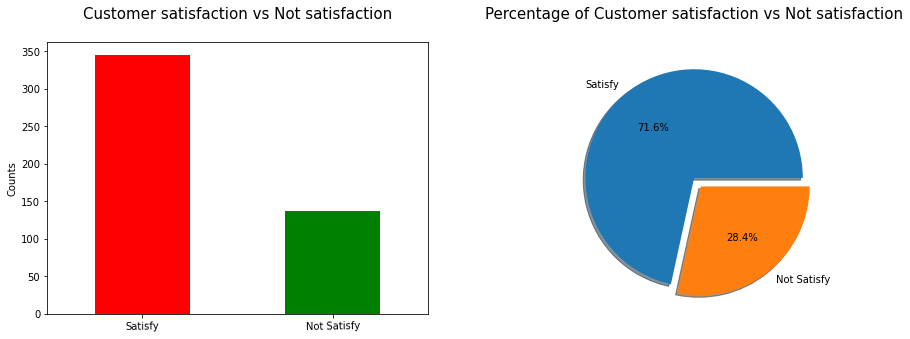

In [104]:
plt.figure(figsize=(15,5))

plt.subplot(121)
satisfaction.plot(kind='bar',color=['r','g'],rot=1)
plt.xticks(range(2),labels=['Satisfy','Not Satisfy'])
plt.ylabel('Counts')
plt.title('Customer satisfaction vs Not satisfaction\n',size=15)


plt.subplot(122)
plt.pie(satisfaction,labels=['Satisfy','Not Satisfy'],autopct='%.1f%%',explode=[0,0.1],shadow=True)
plt.title('Percentage of Customer satisfaction vs Not satisfaction\n',size=15)
plt.show()          